In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

## Subreddit

In [11]:
depression = pd.read_pickle('../depression_tokenized.pickle')
happy = pd.read_csv('../happy_tokenized.csv')
casual = pd.read_pickle('../casual_tokenized.pickle')
suicide = pd.read_csv('../suicide_tokenized.csv')

In [12]:
depression['tokenized_text'] = depression['tokenized_text'].apply(lambda x: " ".join(x))
casual['tokenized_text'] = casual['tokenized_text'].apply(lambda x: " ".join(x))

### Label the data

In [13]:
depression['mental_state'] = 1
casual['mental_state'] = 0
happy['mental_state'] = 0
suicide['mental_state'] = 2

In [14]:
depression = depression[['tokenized_text', 'mental_state']]
casual = casual[['tokenized_text', 'mental_state']]
happy = happy[['tokenized_text', 'mental_state']]
suicide = suicide[['tokenized_text', 'mental_state']]

In [31]:
data = [casual, happy, suicide]
X = depression.copy()
for each_df in data:
    X = pd.concat([X, each_df])

In [32]:
X.reset_index(inplace = True)
X.drop(labels=['index'], axis=1, inplace = True)

In [20]:
X['mental_state'].value_counts()/len(X)

1    0.458658
0    0.294659
2    0.246682
Name: mental_state, dtype: float64

### Split Train and Test

In [36]:
y = X['mental_state']
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

In [38]:
X_train['mental_state'] = y_train
X_test['mental_state'] = y_test

### Save model

In [41]:
X_train.to_csv('../X_train.csv', index = False)
X_test.to_csv('../X_test.csv', index = False)

## Wordcloud Visualisation

In [44]:
def get_word_freq(data, att):
    cvec = CountVectorizer(stop_words = 'english', max_df=0.9, min_df=5)
    cvec.fit(list(data[att]))
    doc_matrix = cvec.transform(data[att])
    doc_matrix = np.sum(doc_matrix,axis=0)
    doc = np.squeeze(np.asarray(doc_matrix))
    term_freq_df = pd.DataFrame(doc_matrix,
                                columns=cvec.get_feature_names()
                               ).transpose()
    term_freq_df.columns = ['freq']
    term_freq_df = term_freq_df.sort_values(by='freq', ascending = False)[:50]
    return term_freq_df['freq'].to_dict()

def generate_wc(freq_words):
    wc = WordCloud(
        background_color="white",
        max_words=50,
        width = 1024,
        height = 720
    )

    wc = wc.generate_from_frequencies(freq_words)

    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


Normal Mental State

In [47]:
X.dropna(inplace = True)

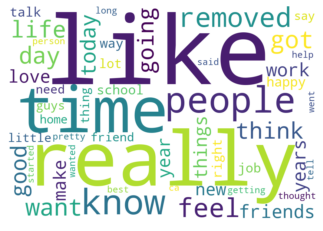

In [48]:
freq_words = get_word_freq(X[X['mental_state']==0], 'tokenized_text')
generate_wc(freq_words)

Depressed Mental State

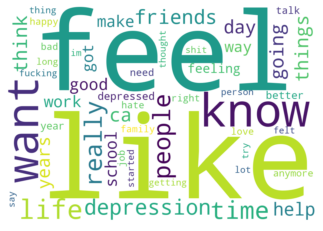

In [49]:
freq_words = get_word_freq(X[X['mental_state']==1], 'tokenized_text')
generate_wc(freq_words)

Suicide Mental State

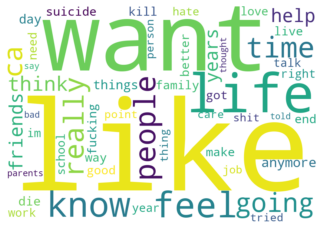

In [50]:
freq_words = get_word_freq(X[X['mental_state']==2], 'tokenized_text')
generate_wc(freq_words)